# Netflix Content Strategy: EDA & Business Insights

## Business Context

Netflix is one of the most popular media and video streaming platforms globally. As of mid-2021, it has over 222M subscribers and offers more than 10,000 movies and TV shows. 

To stay competitive and grow further, Netflix needs to answer questions like:
- What kind of content should we produce more of?
- Which countries should we prioritize for new content?
- What genres and formats (Movies vs TV Shows) resonate in different regions?
- When is the best time to launch content on the platform?

This notebook uses a tabular dataset of all shows and movies available on Netflix (as of the snapshot), with columns such as:
- **show_id**: Unique ID for every title  
- **type**: Movie or TV Show  
- **title**: Title of the content  
- **director**: Director(s)  
- **cast**: Main actors  
- **country**: Production country/countries  
- **date_added**: When it was added to Netflix  
- **release_year**: Year the content was originally released  
- **rating**: Content rating (e.g., TV-MA, PG-13)  
- **duration**: Minutes (for movies) or seasons (for TV shows)  
- **listed_in**: Genres/categories  
- **description**: Short summary  

---

## Problem Statement

**Goal:**  
Analyze Netflix’s catalog to generate **data-driven insights** that help answer:

1. Which types of shows/movies (format, genre, country) should Netflix produce more of?  
2. How can Netflix grow its business in different countries based on current content patterns?

We will:
- Explore content types by country and genre  
- Analyze trends in releases over time  
- Compare Movies vs TV Shows overall and in recent years  
- Analyze actors/directors and their association with successful formats/genres  
- Understand when Netflix tends to add content (best time to launch a show)

The final outcome will be **clear business insights** and **simple recommendations** in non-technical language.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Basic Metrics and Data Understanding

Here we look at:
- Number of rows and columns
- Data types of each attribute
- Sample records
- Basic statistical summary for numeric fields

This helps us understand the overall shape of the dataset and identify potential issues (e.g., wrong data types, obvious missing values).

In [3]:
df.shape

(8807, 12)

In [4]:
df.columns.to_list()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [29]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8806,Consequences,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,NaN,NaN,NaN,2019-05-17 05:59:08.436967168,2008-01-01 00:00:00,2018-04-06 00:00:00,2019-07-02 00:00:00,2020-08-19 00:00:00,2021-09-25 00:00:00,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,1925.0,2013.0,2017.0,2019.0,2021.0,8.819312
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Types, Conversion & Basic Cleaning

Some columns need special handling:

- `date_added` should be converted to datetime.
- `rating`, `type` can be treated as categorical.
- Columns like `country`, `cast`, `director`, and `listed_in` contain multiple values separated by commas and might need to be **unnested** for deeper analysis.

We will:
1. Standardize text where needed (e.g., strip spaces).
2. Convert `date_added` to datetime.
3. Create additional time-based features for analysis.
4. Convert some string columns to categorical type.

In [7]:
str_cols = df.select_dtypes(include='object').columns
for cols in str_cols:
    df[cols] = df[cols].str.strip()

In [8]:
df['date_added'] = pd.to_datetime(df['date_added'])

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_name_added'] = df['date_added'].dt.day_name()

In [9]:
cat_cols = ['type', 'rating']
for cols in cat_cols:
    df[cols] = df[cols].astype('category')

In [10]:
df.dtypes

show_id                   object
type                    category
title                     object
director                  object
cast                      object
country                   object
date_added        datetime64[ns]
release_year               int64
rating                  category
duration                  object
listed_in                 object
description               object
year_added               float64
month_added              float64
day_name_added            object
dtype: object

## Missing Values & Non-Graphical Analysis

Before plotting, we need to understand:

- How many missing values exist in each column?
- How many unique values does each column have?
- What are the most frequent categories for key fields like `type`, `rating`, `country`, `listed_in`?

This will guide our preprocessing and visual exploration.

In [11]:
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_percent = (missing_counts / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_percent": missing_percent
})
missing_df

,missing_count,missing_percent
director,2634,29.91
country,831,9.44
cast,825,9.37
date_added,10,0.11
year_added,10,0.11
month_added,10,0.11
day_name_added,10,0.11
rating,4,0.05
duration,3,0.03
show_id,0,0.00


In [12]:
# Unique counts for each column
unique_counts = df.nunique().sort_values(ascending=False)
unique_counts

show_id           8807
title             8806
description       8775
cast              7692
director          4528
date_added        1714
country            748
listed_in          514
duration           220
release_year        74
rating              17
year_added          14
month_added         12
day_name_added       7
type                 2
dtype: int64

In [13]:
# Key categorical distributions
print("Type distribution:")
print(df['type'].value_counts())

print("\nTop 10 Ratings:")
print(df['rating'].value_counts().head(10))

print("\nTop 10 Countries (raw, multi-valued):")
print(df['country'].value_counts().head(10))

print("\nTop 10 Genres (listed_in, raw):")
print(df['listed_in'].value_counts().head(10))

Type distribution:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Top 10 Ratings:
rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64

Top 10 Countries (raw, multi-valued):
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

Top 10 Genres (listed_in, raw):
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                      

## Preprocessing: Unnesting Multi-Value Columns

Several columns contain multiple values in a single cell (e.g., multiple countries, multiple actors).  
For analysis such as "what content is available in different countries", we need to **split and explode** these lists:

- `country` → `country_exploded`
- `listed_in` (genres) → `genre_exploded`
- `cast` → `actor_exploded`
- `director` → `director_exploded`

This will create a more granular view for counts and comparisons.

In [14]:
def split_explode(df, column_name, new_col_name):
    temp = df.copy()
    temp[new_col_name] = temp[column_name].fillna("").str.split(",")
    temp = temp.explode(new_col_name)
    temp[new_col_name] = temp[new_col_name].str.strip()
    temp = temp[temp[new_col_name] != ""] # remove empty string lists
    return temp

# Exploded by country
df_country = split_explode(df, 'country', 'country_exploded')

# Exploded by genre
df_genre = split_explode(df, 'listed_in', 'genre_exploded')

# Exploded by actor
df_actor = split_explode(df, 'cast', 'actor_exploded')

# Exploded by director
df_director = split_explode(df, 'director', 'director_exploded')

## Visual Analysis – Univariate

In this section, we look at the distribution of individual variables:

- Type (Movie vs TV Show)
- Release year
- Year added to Netflix
- Ratings
- Duration (for movies)
- Number of seasons (for TV shows)

We use:
- Histograms / distplots for continuous variables
- Countplots for categorical variables
- Boxplots for spread and outliers

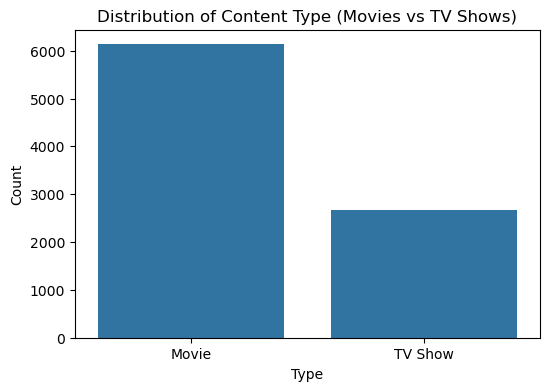

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title("Distribution of Content Type (Movies vs TV Shows)")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

**Observation:**  
Netflix hosts both Movies and TV Shows, with movies forming the larger share of titles in this snapshot. TV Shows are also a significant portion, suggesting that series content is an important part of the catalog.

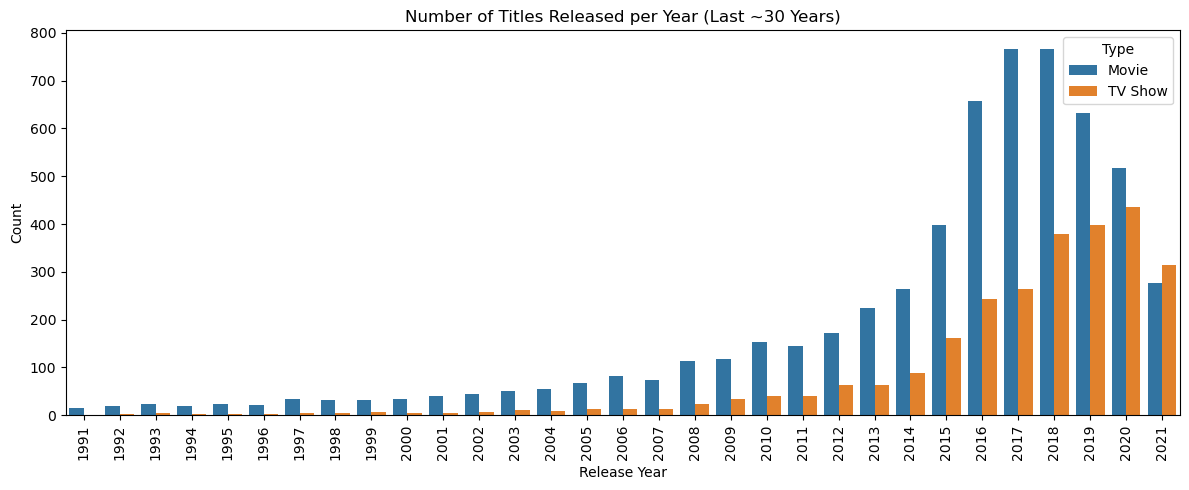

In [16]:
release_30 = df.loc[df['release_year'].between(df['release_year'].max()-30, df['release_year'].max())]

plt.figure(figsize=(12,5))
sns.countplot(data=release_30, x='release_year', hue='type')
plt.title("Number of Titles Released per Year (Last ~30 Years)")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Type")
plt.tight_layout()
plt.show()

**Observation:**  
There is a clear increase in the number of titles released in the more recent years compared to older years. Both movies and TV shows have grown, with particularly strong growth in the last decade, reflecting the global expansion of streaming as a distribution channel.

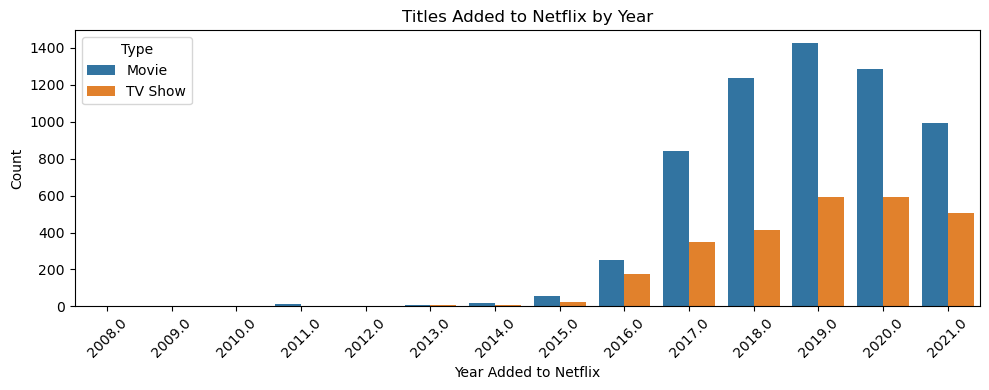

In [32]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='year_added', hue='type')
plt.title("Titles Added to Netflix by Year")
plt.xlabel("Year Added to Netflix")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Type")
plt.tight_layout()
plt.show()

**Observation:**  
The number of titles added to Netflix has generally increased over time, with a noticeable surge in recent years. This indicates Netflix’s strategy of aggressively expanding its catalog, especially in the years just before the dataset snapshot.

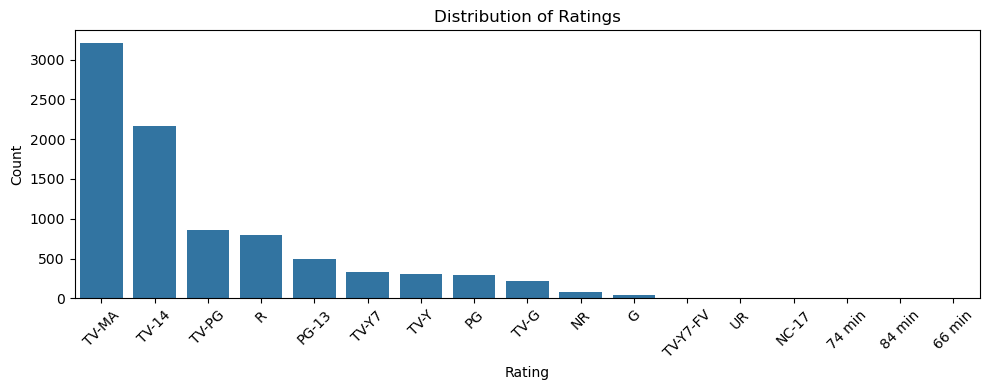

In [18]:
plt.figure(figsize=(10,4))
order = df['rating'].value_counts().index
sns.countplot(data=df, x='rating', order=order)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation:**  
Most content is concentrated in a few rating categories (e.g., TV-MA, TV-14, TV-PG). This suggests that Netflix focuses on a mix of mature content and titles suitable for teenagers/families, rather than only child-focused or only adult-only content.

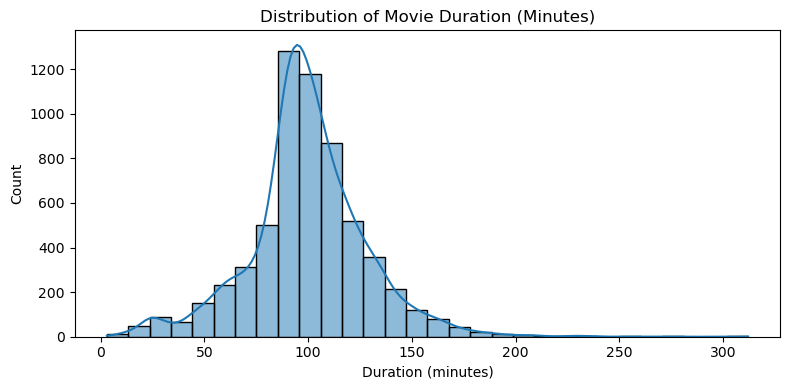

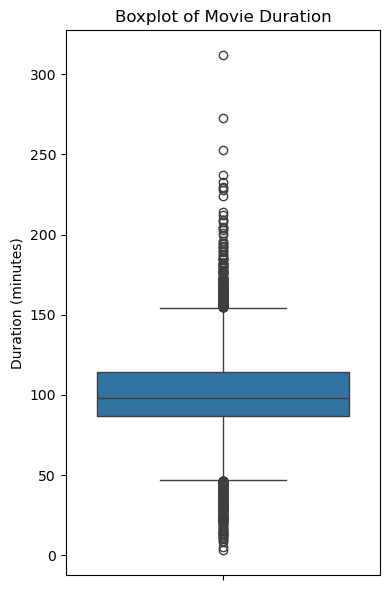

In [34]:
# Separate movies and TV shows
movies = df.loc[df['type'] == 'Movie'].copy()
shows = df.loc[df['type'] == 'TV Show'].copy()

# Extract numeric duration for movies
movies['duration_min'] = movies['duration'].str.replace(' min', '').astype('float')

plt.figure(figsize=(8,4))
sns.histplot(movies['duration_min'].dropna(), bins=30, kde=True)
plt.title("Distribution of Movie Duration (Minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(4,6))
sns.boxplot(y=movies['duration_min'])
plt.title("Boxplot of Movie Duration")
plt.ylabel("Duration (minutes)")
plt.tight_layout()
plt.show()

**Observation:**  
Most movies cluster around a typical feature-length range (roughly 80–120 minutes), with some outliers that are much shorter or longer. This suggests that standard feature-length movies dominate Netflix’s movie catalog.

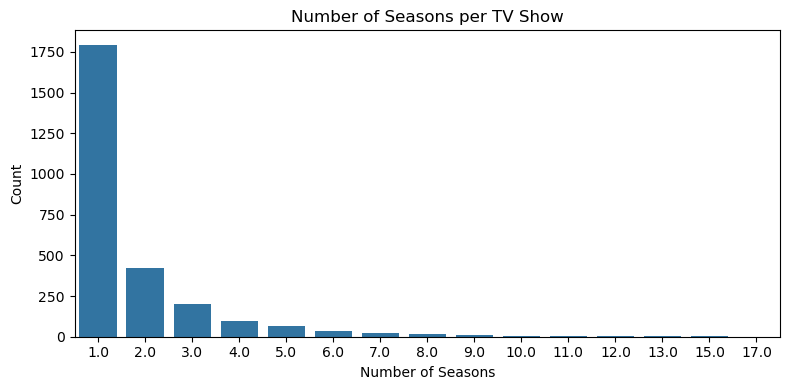

In [35]:
shows['seasons'] = shows['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype('float')

plt.figure(figsize=(8,4))
sns.countplot(x=shows['seasons'])
plt.title("Number of Seasons per TV Show")
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

**Observation:**  
Most TV shows on Netflix have a relatively small number of seasons (often 1–3), indicating a large number of mini-series or shows with limited seasons rather than very long-running series.

## Visual Analysis – Bivariate

Now we analyze relationships between variables:

- Type vs Year (Movies vs TV Shows over time)
- Type vs Duration
- Content type and genre distribution
- Content availability by country
- Time pattern of content addition (best time to launch)

/var/folders/4v/r1w5g21146388lqn4pyhv1640000gn/T/ipykernel_16594/2796947999.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titles_by_year_type = df.groupby(['release_year', 'type'])['show_id'].count().reset_index(name='count')


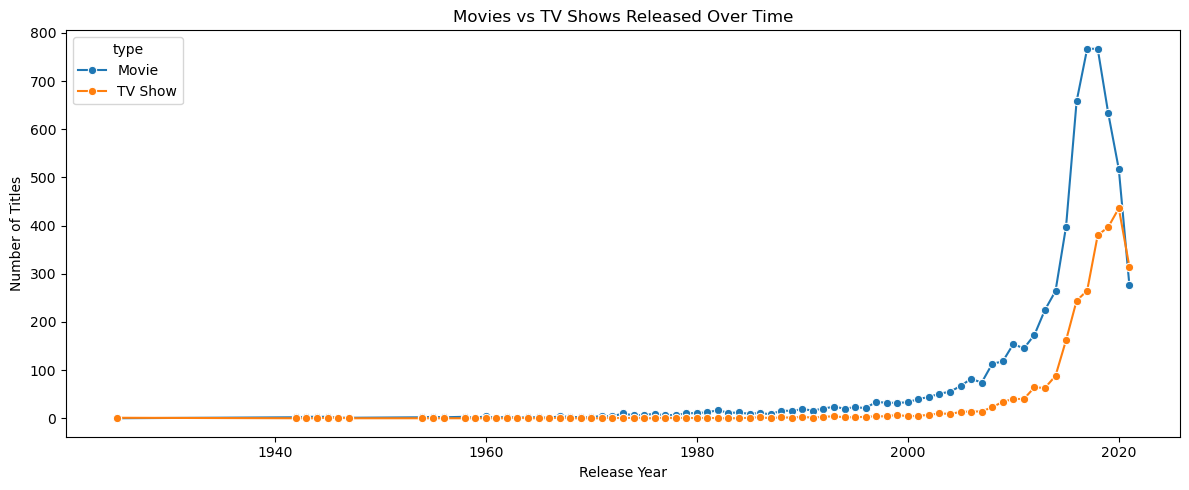

In [21]:
titles_by_year_type = df.groupby(['release_year', 'type'])['show_id'].count().reset_index(name='count')

plt.figure(figsize=(12,5))
sns.lineplot(data=titles_by_year_type, x='release_year', y='count', hue='type', marker='o')
plt.title("Movies vs TV Shows Released Over Time")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()

**Observation:**  
Movies have historically dominated in terms of count, but TV Shows have grown sharply in more recent years. This indicates that Netflix is increasingly investing in serialized content.

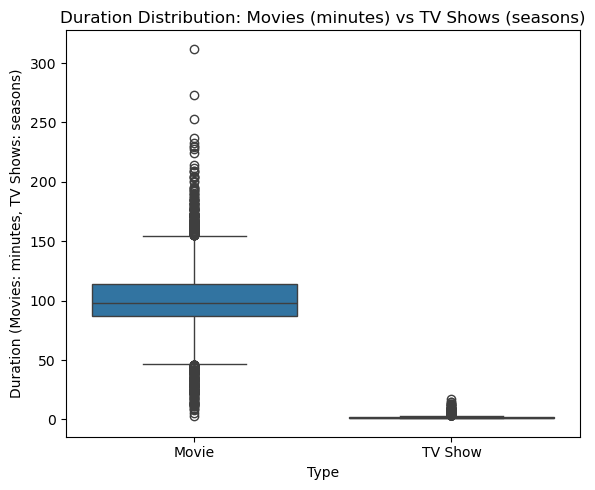

In [37]:
# Combine numeric durations for plotting
movies_for_box = movies[['duration_min']].copy()
movies_for_box = movies_for_box.rename(columns={'duration_min': 'duration_unit'})
movies_for_box['type'] = 'Movie'

shows_for_box = shows[['seasons']].copy()
shows_for_box = shows_for_box.rename(columns={'seasons': 'duration_unit'})
shows_for_box['type'] = 'TV Show'

combined_duration = pd.concat([movies_for_box, shows_for_box], ignore_index=True)

plt.figure(figsize=(6,5))
sns.boxplot(data=combined_duration, x='type', y='duration_unit')
plt.title("Duration Distribution: Movies (minutes) vs TV Shows (seasons)")
plt.xlabel("Type")
plt.ylabel("Duration (Movies: minutes, TV Shows: seasons)")
plt.tight_layout()
plt.show()

**Observation:**  
Movies show a wider spread in length (in minutes), while TV shows cluster around a small number of seasons. From a user perspective, this provides both “quick watch” options (movies, mini-series) and longer engagement options (multi-season series).

/var/folders/4v/r1w5g21146388lqn4pyhv1640000gn/T/ipykernel_16594/3612269333.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_type_counts = df_country.groupby(['country_exploded', 'type'])['show_id'].count().reset_index(name='count')


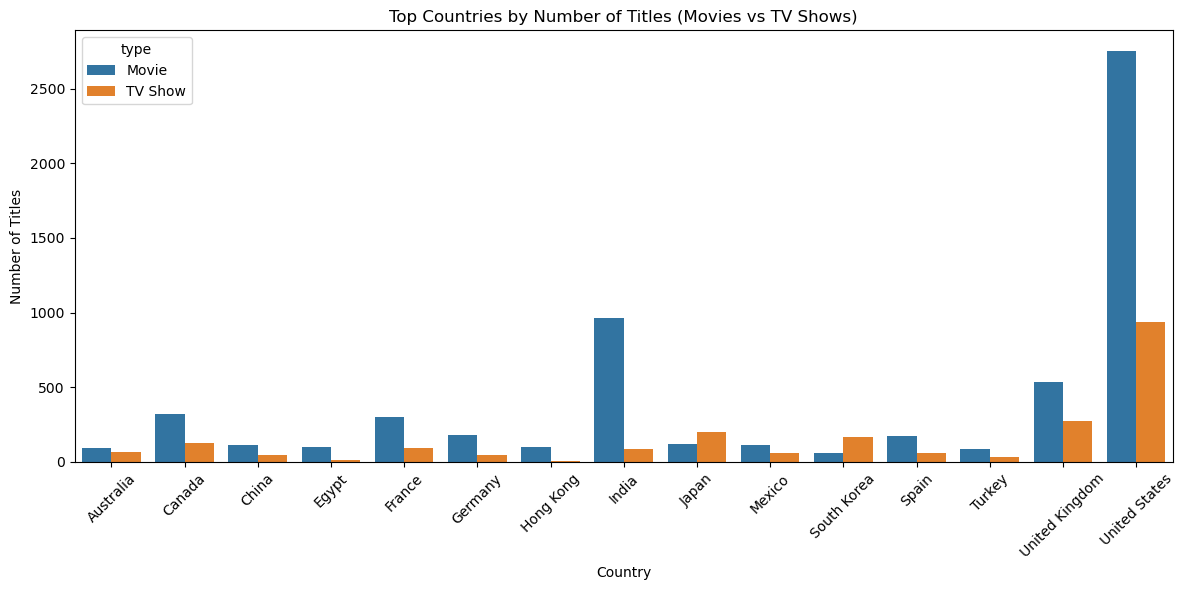

In [23]:
country_type_counts = df_country.groupby(['country_exploded', 'type'])['show_id'].count().reset_index(name='count')

# Top 15 countries by total titles
top_countries = (country_type_counts.groupby('country_exploded')['count']
                 .sum().sort_values(ascending=False).head(15).index)

top_country_type = country_type_counts[country_type_counts['country_exploded'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.barplot(data=top_country_type, x='country_exploded', y='count', hue='type')
plt.title("Top Countries by Number of Titles (Movies vs TV Shows)")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation:**  
A few key countries (such as the United States, India, and the United Kingdom) dominate the catalog. The balance between Movies and TV Shows varies by country, indicating that some markets are more series-centric while others have more movies. This can guide country-specific content production strategies.

/var/folders/4v/r1w5g21146388lqn4pyhv1640000gn/T/ipykernel_16594/2598031204.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_type_counts = df_genre.groupby(['genre_exploded', 'type'])['show_id'].count().reset_index(name='count')


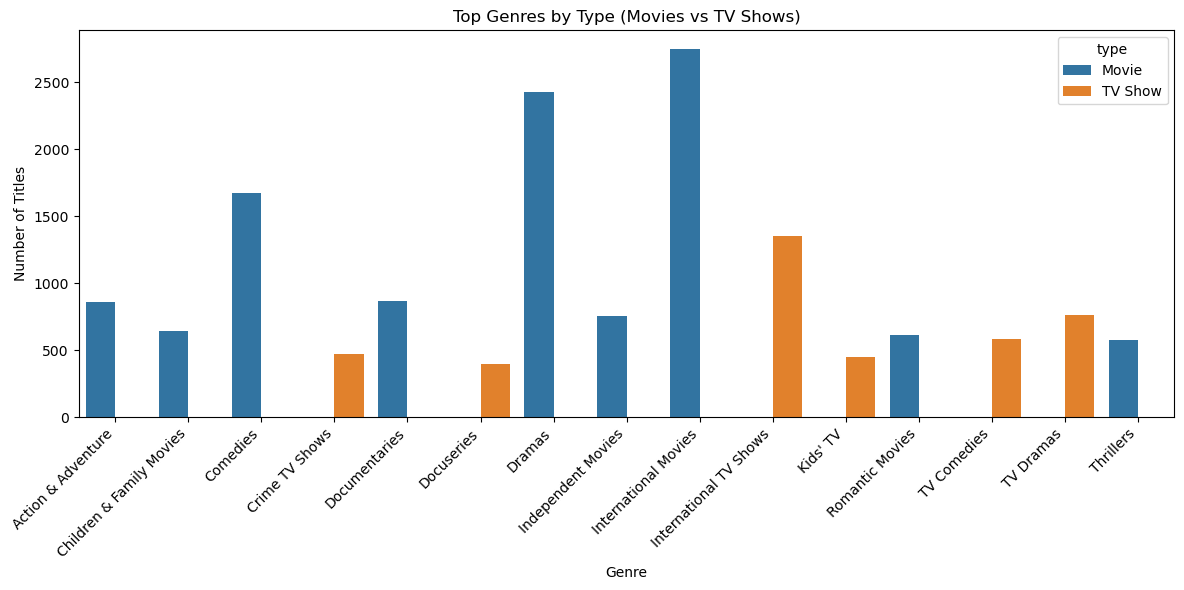

In [24]:
genre_type_counts = df_genre.groupby(['genre_exploded', 'type'])['show_id'].count().reset_index(name='count')

top_genres = (genre_type_counts.groupby('genre_exploded')['count']
              .sum().sort_values(ascending=False).head(15).index)

top_genre_type = genre_type_counts[genre_type_counts['genre_exploded'].isin(top_genres)]

plt.figure(figsize=(12,6))
sns.barplot(data=top_genre_type, x='genre_exploded', y='count', hue='type')
plt.title("Top Genres by Type (Movies vs TV Shows)")
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Observation:**  
Some genres (e.g., International Dramas, Comedies, Documentaries) are heavily represented. Certain genres lean more towards TV Shows (e.g., TV Dramas, TV Comedies), while others are more movie-heavy. This helps identify which genres and formats are already saturated and which may present opportunities.

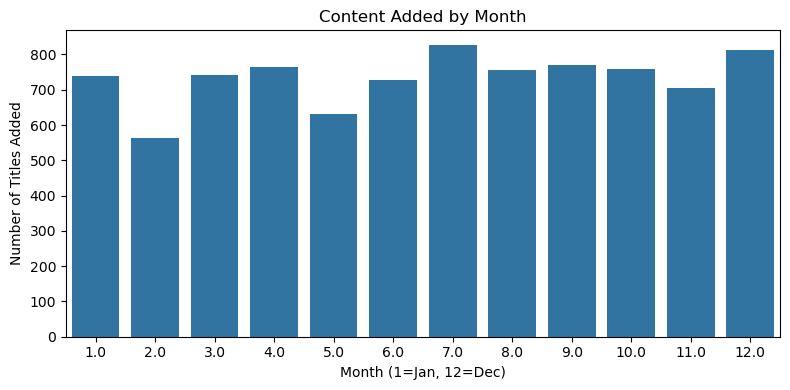

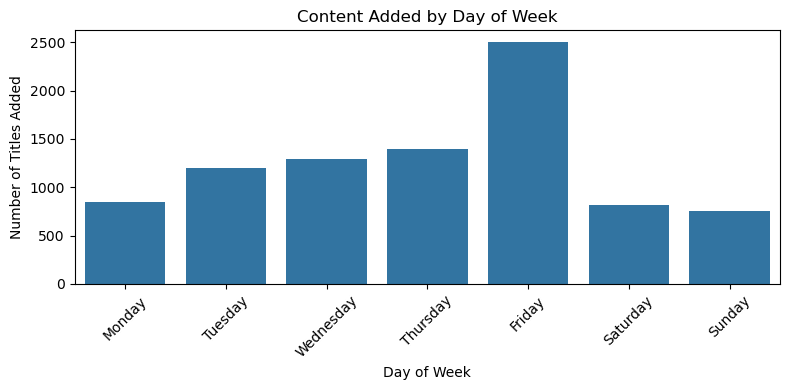

In [25]:
# Month analysis
month_counts = df.dropna(subset=['month_added']).groupby('month_added')['show_id'].count().reset_index(name='count')

plt.figure(figsize=(8,4))
sns.barplot(data=month_counts, x='month_added', y='count')
plt.title("Content Added by Month")
plt.xlabel("Month (1=Jan, 12=Dec)")
plt.ylabel("Number of Titles Added")
plt.tight_layout()
plt.show()

# Day of week analysis
day_counts = df.dropna(subset=['day_name_added']).groupby('day_name_added')['show_id'].count().reset_index(name='count')

# Order days for nicer plot
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts['day_name_added'] = pd.Categorical(day_counts['day_name_added'], categories=day_order, ordered=True)
day_counts = day_counts.sort_values('day_name_added')

plt.figure(figsize=(8,4))
sns.barplot(data=day_counts, x='day_name_added', y='count')
plt.title("Content Added by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Titles Added")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation:**  
Content additions are spread across the year and days of the week, but certain months and days show slightly higher volumes. In practice, Netflix can use this pattern to schedule big releases around periods when users are more active (e.g., weekends, holidays, or specific months).

In [26]:
# Top actors overall
top_actors = df_actor['actor_exploded'].value_counts().head(15)
top_actors

actor_exploded
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Amitabh Bachchan    28
Boman Irani         27
Rajesh Kava         26
Vincent Tong        26
Andrea Libman       25
Name: count, dtype: int64

In [27]:
# Top directors overall
top_directors = df_director['director_exploded'].value_counts().head(15)
top_directors

director_exploded
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Steven Spielberg       11
Don Michael Paul       10
Shannon Hartman         9
Yılmaz Erdoğan          9
David Dhawan            9
Name: count, dtype: int64

/var/folders/4v/r1w5g21146388lqn4pyhv1640000gn/T/ipykernel_16594/158440903.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_actor_type = df_actor.groupby(['actor_exploded', 'type'])['show_id'].count().reset_index(name='count')


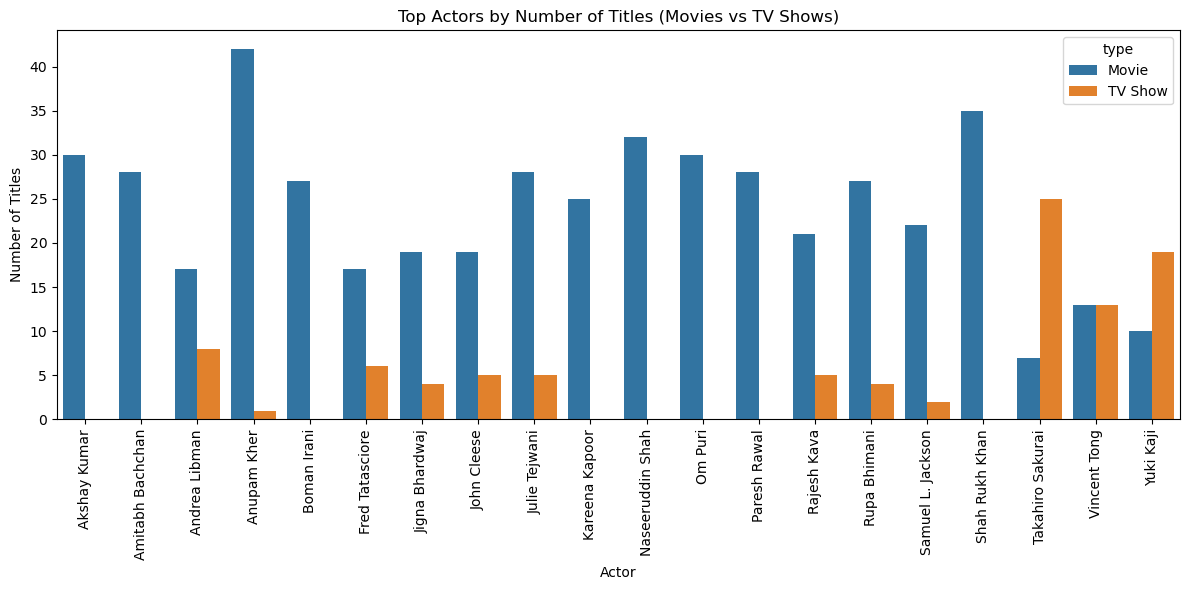

In [38]:
# Example: Top actors in TV Shows vs Movies
top_actor_type = df_actor.groupby(['actor_exploded', 'type'])['show_id'].count().reset_index(name='count')

top_actor_overall = df_actor['actor_exploded'].value_counts().head(20).index
top_actor_type = top_actor_type[top_actor_type['actor_exploded'].isin(top_actor_overall)]

plt.figure(figsize=(12,6))
sns.barplot(data=top_actor_type, x='actor_exploded', y='count', hue='type')
plt.title("Top Actors by Number of Titles (Movies vs TV Shows)")
plt.xlabel("Actor")
plt.ylabel("Number of Titles")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Observation:**  
A small set of actors and directors appear in multiple titles. These frequent collaborators are often associated with specific genres or formats. Partnering further with such “proven” talent in key markets can be a relatively safe strategy for new productions.

## Missing Values & Outliers – Summary

**Missing Values:**
- Columns like `director`, `cast`, and `country` show a noticeable number of missing values. This is expected for some titles (e.g., stand-up specials or older content with incomplete metadata).
- `date_added` is missing for a small subset of titles, which slightly limits time-based analysis for those rows.
- Other fields (such as `type`, `title`, and `release_year`) are largely complete, which is good for our core analysis.

In this notebook, we:
- Kept rows with missing metadata if core fields were present.
- Treated missing `country`, `director`, and `cast` as “Unknown” when needed for grouping (or dropped them for some specific analyses).

**Outliers:**
- Movie duration shows some outliers with unusually short or long durations.
- TV shows with very high numbers of seasons are rare and can be considered natural outliers representing long-running franchises.

Since the goal is **exploratory analysis and strategy**, we did not perform aggressive outlier removal, but we interpreted the charts with these outliers in mind.

## Business Insights

Based on the exploratory analysis, we observe the following patterns:

1. **Movies still dominate, but TV Shows are growing rapidly.**  
   - Movies make up a larger share of the catalog, but TV shows have grown strongly in recent years.  
   - This indicates a shift toward serialized content, likely driven by user demand for binge-worthy series.

2. **Recent content is heavily represented.**  
   - Most titles in the dataset were released in the last 10–20 years, with a noticeable spike in the most recent decade.  
   - Older classics exist but form a smaller portion of the catalog, suggesting Netflix positions itself as a platform for modern and current content.

3. **Aggressive expansion in recent years.**  
   - The number of titles added to Netflix per year has increased, especially in the years just before the dataset snapshot.  
   - This reflects a strategy of rapidly expanding both the depth (more titles) and breadth (more countries and genres) of the catalog.

4. **Country-level concentration with global reach.**  
   - A few key production countries (such as the US, India, and the UK) account for a large share of titles.  
   - At the same time, content comes from many different countries, supporting Netflix’s global positioning and local language offerings.

5. **Genre mix: strong presence of drama, comedy, and international titles.**  
   - Dramas, comedies, and international content categories are among the most common genres.  
   - TV-specific genres (e.g., TV Dramas, TV Comedies) show that Netflix has built strong “series” offerings within popular genres.

6. **Duration patterns: standard feature-length movies and short multi-season shows.**  
   - Most movies fall into a typical feature-length range (roughly 80–120 minutes).  
   - Most TV shows have 1–3 seasons, balancing between limited series (low risk) and longer-running franchises (high engagement).

7. **Calendar and weekday patterns can support launch planning.**  
   - Titles are added throughout the year, with some months and days showing slightly higher activity.  
   - This suggests that Netflix can time major releases around periods of higher user engagement (e.g., weekends, holidays, or specific high-traffic months).

8. **A core set of actors and directors appear repeatedly.**  
   - Certain actors and directors appear in many titles, often within specific genres or regions.  
   - These recurring names likely have proven audience appeal, making them strong candidates for future collaborations.

## Recommendations for Netflix

Based on the patterns observed, here are simple, actionable recommendations:

1. **Continue investing in TV Shows, especially in high-growth markets.**  
   - TV shows are growing quickly and drive binge-watching and retention.  
   - Focus on creating more local-language series in markets with strong TV show consumption (e.g., India, Europe, Latin America).

2. **Double down on popular genres in each region.**  
   - Globally, dramas and comedies work very well, but the exact mix varies by country.  
   - Use the country-level genre breakdown to decide:
     - Which genres to prioritize in each region (e.g., crime dramas in one country, romantic comedies in another).
     - Where there are “gaps” in high-potential genres with low current supply.

3. **Balance “safe bets” with “new experiments”.**  
   - Partner with actors and directors who already have multiple successful titles on Netflix (safe bets with a proven fanbase).  
   - At the same time, allocate a portion of the budget to new talent in growing genres to discover future stars and fresh voices.

4. **Optimize release timing using engagement patterns.**  
   - Use month and weekday patterns to schedule big releases during high-traffic periods (e.g., weekends and holiday seasons).  
   - For new, risky content (new genres or unknown talent), release during high-engagement times so it gets more visibility.

5. **Strengthen local production in under-served but promising markets.**  
   - Identify countries with fast-growing subscriber bases but relatively few local titles in the catalog.  
   - Commission more local movies and series in those countries, focusing on the top 2–3 local genres.

6. **Build “content ladders” for different time budgets.**  
   - Since most movies are feature-length and most series are 1–3 seasons, Netflix can design recommendation paths such as:
     - Quick watch (1 episode or 90-minute movie)  
     - Weekend binge (1–2 seasons)  
     - Long-term engagement (multi-season series)  
   - This helps match content to how much time users have available.

7. **Use catalog gaps as opportunities.**  
   - Look for combinations of country + genre + format where Netflix has relatively few titles but where similar markets show strong performance.  
   - For example, if crime TV shows work well in Country A but are under-represented in Country B with a similar profile, invest in crime TV shows for Country B.

By following these steps, Netflix can make smarter decisions about **what to produce**, **where to produce it**, and **when to release it**, all grounded in actual catalog data rather than guesswork.